## import library

In [14]:
import pandas as pd
import numpy as np
from google_play_scraper import app, reviews_all, reviews, Sort
import csv
import pandas as pd
from operator import index
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from tensorflow.keras.layers import Reshape
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import pickle

import requests
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, BatchNormalization, GRU, SimpleRNN, Conv1D,GlobalMaxPooling1D
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Afit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Afit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## ambil data dari reviews.csv dan menambahkan ke dataframe

In [2]:
df = pd.read_csv('reviews.csv')
jumlah_review, jumlah_kolom = df.shape
clean_df = df.drop(columns=['reviewId', 'userName', 'userImage','thumbsUpCount','reviewCreatedVersion','at','replyContent', 'repliedAt','appVersion'], axis=1)
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()
clean_review, clean_column = clean_df.shape
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49968 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  49968 non-null  object
 1   score    49968 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [3]:
clean_df.head()

,content,score
0,I use mobile and there are things I don't like...,3
1,Having an issue with my purchased movies only ...,1
2,Woke up to a UI change that makes it difficult...,1
3,"Recently, the app won't stay connected to my T...",1
4,Whatever the newest update to the interface fo...,2


## preprocessing text

In [4]:
def cleaningtext(text):
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefolding(text):
    text = text.lower()
    return text

def tokenizing(text):
    text = text.split()
    return text


def filtertext(text):
    liststopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in liststopwords:
            filtered.append(txt)
    return filtered

lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_words


def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Afit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


apply fungsi preprocessing text

In [5]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningtext)
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefolding)
clean_df['text_tokenizing'] = clean_df['text_casefolding'].apply(tokenizing)
clean_df['lemmatized'] = clean_df['text_tokenizing'].apply(lemmatize_text)
clean_df['text_stopword'] = clean_df['lemmatized'].apply(filtertext)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [6]:
clean_df.tail()

,content,score,text_clean,text_casefolding,text_tokenizing,lemmatized,text_stopword,text_akhir
49995,Before the update it was good now the only thi...,1,Before the update it was good now the only thi...,before the update it was good now the only thi...,"[before, the, update, it, was, good, now, the,...","[before, the, update, it, wa, good, now, the, ...","[update, wa, good, thing, watch, short, every,...",update wa good thing watch short every single ...
49996,full screen video mode screen rotate is left h...,1,full screen video mode screen rotate is left h...,full screen video mode screen rotate is left h...,"[full, screen, video, mode, screen, rotate, is...","[full, screen, video, mode, screen, rotate, is...","[full, screen, video, mode, screen, rotate, le...",full screen video mode screen rotate left hand...
49997,Edit june 24th 2023; just need to use x button...,5,Edit june th just need to use x button to clo...,edit june th just need to use x button to clo...,"[edit, june, th, just, need, to, use, x, butto...","[edit, june, th, just, need, to, use, x, butto...","[edit, june, th, need, use, x, button, close, ...",edit june th need use x button close overlay b...
49998,"Well, they have gotten better about not showin...",2,Well they have gotten better about not showing...,well they have gotten better about not showing...,"[well, they, have, gotten, better, about, not,...","[well, they, have, gotten, better, about, not,...","[well, gotten, better, showing, exact, ad, new...",well gotten better showing exact ad new proble...
49999,YouTube became worst after the new update. It'...,1,YouTube became worst after the new update Its ...,youtube became worst after the new update its ...,"[youtube, became, worst, after, the, new, upda...","[youtube, became, worst, after, the, new, upda...","[youtube, became, worst, new, update, already,...",youtube became worst new update already ruined...


## labelling data based on lexicon

In [7]:
# Mengambil lexicon positif dan negatif
positive_lexicon_url = 'https://raw.githubusercontent.com/nik0spapp/usent/master/lexicon/positive-words.txt'
negative_lexicon_url = 'https://raw.githubusercontent.com/nik0spapp/usent/master/lexicon/negative-words.txt'

positive_words = set(requests.get(positive_lexicon_url).text.splitlines())
negative_words = set(requests.get(negative_lexicon_url).text.splitlines())

def label_review(review):
    review_words = set(review.split())
    if review_words & positive_words:
        return 'positif'
    elif review_words & negative_words:
        return 'negatif'
    else:
        return 'netral'

clean_df['polarity'] = clean_df['text_akhir'].apply(label_review)

In [8]:
print(clean_df.value_counts('polarity'))

polarity
positif    35193
negatif    11548
netral      3227
Name: count, dtype: int64


In [9]:
clean_df.head()

,content,score,text_clean,text_casefolding,text_tokenizing,lemmatized,text_stopword,text_akhir,polarity
0,I use mobile and there are things I don't like...,3,I use mobile and there are things I dont like ...,i use mobile and there are things i dont like ...,"[i, use, mobile, and, there, are, things, i, d...","[i, use, mobile, and, there, are, thing, i, do...","[use, mobile, thing, dont, like, update, fulls...",use mobile thing dont like update fullscreen w...,positif
1,Having an issue with my purchased movies only ...,1,Having an issue with my purchased movies only ...,having an issue with my purchased movies only ...,"[having, an, issue, with, my, purchased, movie...","[having, an, issue, with, my, purchased, movie...","[issue, purchased, movie, allowing, italian, g...",issue purchased movie allowing italian german ...,negatif
2,Woke up to a UI change that makes it difficult...,1,Woke up to a UI change that makes it difficult...,woke up to a ui change that makes it difficult...,"[woke, up, to, a, ui, change, that, makes, it,...","[woke, up, to, a, ui, change, that, make, it, ...","[woke, ui, change, make, difficult, navigate, ...",woke ui change make difficult navigate case ne...,positif
3,"Recently, the app won't stay connected to my T...",1,Recently the app wont stay connected to my TV ...,recently the app wont stay connected to my tv ...,"[recently, the, app, wont, stay, connected, to...","[recently, the, app, wont, stay, connected, to...","[recently, app, wont, stay, connected, tv, cau...",recently app wont stay connected tv cause play...,positif
4,Whatever the newest update to the interface fo...,2,Whatever the newest update to the interface fo...,whatever the newest update to the interface fo...,"[whatever, the, newest, update, to, the, inter...","[whatever, the, newest, update, to, the, inter...","[whatever, newest, update, interface, android,...",whatever newest update interface android phone...,negatif


## eksperiment 1 : ekstraksi fitur dengan word2vec, pembagian data 90:10, dan modelling dengan lstm

pembagian data

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post')

le = LabelEncoder()
clean_df['polarity'] = le.fit_transform(clean_df['polarity'])
y = to_categorical(clean_df['polarity'])

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.1, random_state=42)

save tokenizer dan label_encoder untuk test di file test_and_inference

In [43]:
# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save LabelEncoder
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

ekstraksi fitur dengan word2vec

In [15]:
sentences = clean_df['text_akhir'].apply(lambda x: x.split()).tolist()
w2v = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v.wv:
        embedding_matrix[i] = w2v.wv[word]

modelling dengan lstm

In [18]:
model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(3, activation='softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     3,372,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,372,200 (12.86 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,372,200 (12.86 MB)

None


train model

In [21]:
class akurasistop(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >0.92 and logs.get('val_accuracy')>0.93:
      print("\nAkurasi telah mencapai >93%!")
      self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)


history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_test, y_test),
    callbacks=[akurasistop(), early_stopping]
    )


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.7313 - loss: 1.0542 - val_accuracy: 0.8221 - val_loss: 0.4267
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 94s 536ms/step - accuracy: 0.8120 - loss: 0.4516 - val_accuracy: 0.8443 - val_loss: 0.3697
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 95s 538ms/step - accuracy: 0.8380 - loss: 0.3944 - val_accuracy: 0.8623 - val_loss: 0.3199
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 92s 520ms/step - accuracy: 0.8551 - loss: 0.3530 - val_accuracy: 0.8699 - val_loss: 0.4683
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 163s 926ms/step - accuracy: 0.8659 - loss: 0.3613 - val_accuracy: 0.8823 - val_loss: 0.2866
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 90s 511ms/step - accuracy: 0.8737 - loss: 0.3157 - val_accuracy: 0.8823 - val_loss: 0.2829
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 88s 501ms/step - accuracy: 0.8775 - loss: 0.3025 - val_accuracy: 0.8927 - val_loss: 0.2676
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 87s 491ms/step - accuracy: 0.8840 - loss: 0.

evaluate

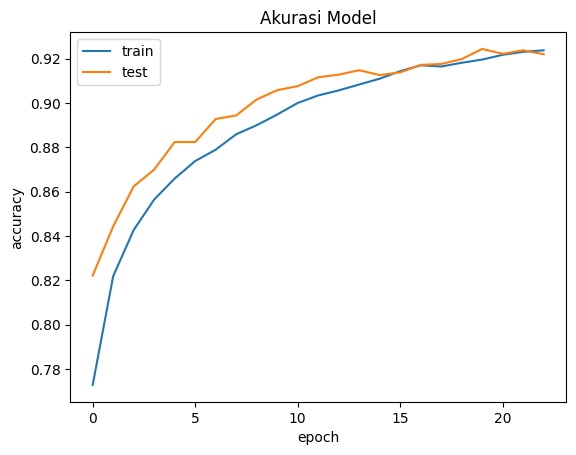

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model.evaluate(x_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9270 - loss: 0.1993


[0.2064460664987564, 0.924354612827301]

save model

In [34]:
model.save('model_word2vec_lstm.keras')

## percobaan 2 : dengan ekstrakasi fitur Glove dan CNN untuk modelling, serta pembagian data 85:15

split data 85:15

In [36]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(padded_sequences, y, test_size=0.15, random_state=42)

upload glove dari file txt

In [37]:
embeddings_index = {}
with open('a2_glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding matrix versi glove

In [38]:
embedding_matrix_glove = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_glove[i] = embedding_vector

In [39]:
embedding_matrix_glove.shape

(33722, 100)

modelling dengan cnn

In [40]:
from tensorflow.keras.layers import SpatialDropout1D
model_glove_cnn = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix_glove], trainable=False),
    Conv1D(128, 5, activation='relu'),
    Dropout(0.2),
    SpatialDropout1D(0.2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(3, activation='softmax'),
])

model_glove_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_glove_cnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     3,372,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,372,200 (12.86 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,372,200 (12.86 MB)

None


train model

In [41]:
class akurasistop(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >0.93 and logs.get('val_accuracy')>0.93:
      print("\nAkurasi telah mencapai >93%!")
      self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history_glove_cnn = model_glove_cnn.fit(
    x_train_2, y_train_2,
    epochs=50,
    batch_size=32,
    validation_data=(x_test_2, y_test_2),
    callbacks=[akurasistop(), early_stopping]
)

Epoch 1/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7433 - loss: 0.9862 - val_accuracy: 0.8626 - val_loss: 0.3686
Epoch 2/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.8653 - loss: 0.3581 - val_accuracy: 0.8909 - val_loss: 0.2979
Epoch 3/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8950 - loss: 0.2814 - val_accuracy: 0.9086 - val_loss: 0.2601
Epoch 4/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9150 - loss: 0.2422 - val_accuracy: 0.9112 - val_loss: 0.2403
Epoch 5/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9261 - loss: 0.2141 - val_accuracy: 0.9165 - val_loss: 0.2309
Epoch 6/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9358 - loss: 0.1934 - val_accuracy: 0.9184 - val_loss: 0.2292
Epoch 7/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9438 - loss: 0.1734 - val_accuracy: 0.9278 - val_loss: 0.2091
Epoch 8/50
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9471 -

evaluate

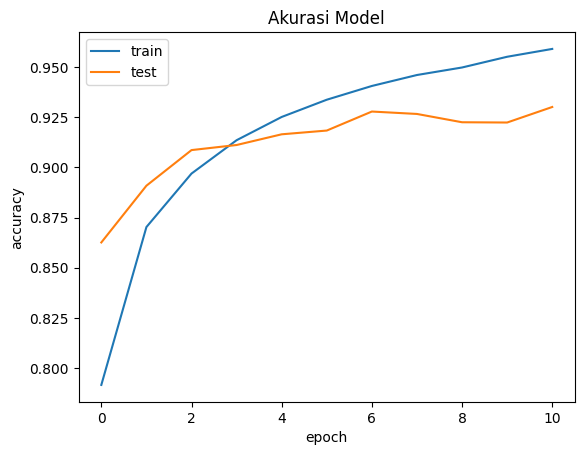

In [43]:
plt.plot(history_glove_cnn.history['accuracy'])
plt.plot(history_glove_cnn.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model_glove_cnn.evaluate(x_test_2, y_test_2)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9312 - loss: 0.2063


[0.21381351351737976, 0.9300960302352905]

save model

In [45]:
model_glove_cnn.save('model_glove_cnn.keras')

## Percobaan 3 : dengan ekstraksi fitur tf-idf, split data 80:20, dan dengan modelling gru

ekstraksi fitur dengan tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(clean_df['text_akhir']).toarray()

save tfidf untuk test di file test_and_inference

In [16]:
with open('tfidf.pickle', 'wb') as handle:
    pickle.dump(tfidf, handle, protocol=pickle.HIGHEST_PROTOCOL)

split data 80:20

In [47]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [48]:
x_train_3.shape

(39974, 33665)

modelling dengan gru

In [51]:
model_gru = Sequential([
    Dense(128, activation='relu', input_shape=(33665,)),
    Reshape((1, 128)),  # Reshape to add a time dimension
    Dropout(0.2),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(3, activation='softmax'),
])

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_gru.summary())

c:\Users\Afit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │     4,309,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,425,219 (16.88 MB)

 Trainable params: 4,425,219 (16.88 MB)

 Non-trainable params: 0 (0.00 B)

None


train model

In [52]:
class akurasistop(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >0.93 and logs.get('val_accuracy')>0.93:
      print("\nAkurasi telah mencapai >93%!")
      self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history_gru = model_gru.fit(
    x_train_3, y_train_3,
    epochs=50,
    batch_size=256,
    validation_data=(x_test_3, y_test_3),
    callbacks=[akurasistop(), early_stopping]
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - accuracy: 0.6980 - loss: 1.4884 - val_accuracy: 0.8806 - val_loss: 0.3766
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - accuracy: 0.9074 - loss: 0.2750 - val_accuracy: 0.9328 - val_loss: 0.1932
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9735 - loss: 0.1091
Akurasi telah mencapai >93%!
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9735 - loss: 0.1091 - val_accuracy: 0.9578 - val_loss: 0.1343


evaluate

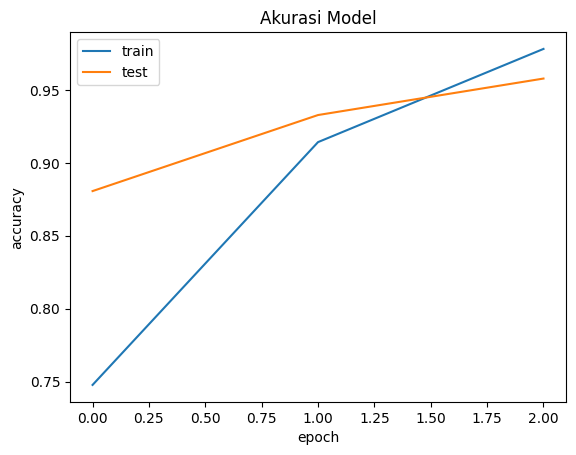

In [53]:
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
model_gru.evaluate(x_test_3, y_test_3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9570 - loss: 0.1388


[0.13432437181472778, 0.9577746391296387]

save model

In [55]:
model_gru.save('model_gru.keras')